In [3]:
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
#file_name=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2014.csv',names=['states','district','year','murder','Rape','Custodial Rape', 'Custodial_Gang Rape','Offences promoting enmity between different groups','Promoting enmity between different groups' ,'Imputation', 'assertions prejudicial to national integration' ,'Extortion','Disclosure of Identity of Victims' ,'Incidence of Rash Driving' ,'HumanTrafficking','Unnatural Offence','Other IPC crimes','Total Cognizable IPC crimes'])
fn=pd.read_csv('/home/frank/Documents/env01/crime-analysis-in-India/data/01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [62]:
#fn=fn.loc[fn['District']=='Total']

In [11]:
fn 

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [45]:
district=[]
for i in fn['DISTRICT']:
    district.append(i[0]+i[1:].lower())
#district

In [50]:
#fn.plot()
fn=fn[['MURDER']]
fn['DISTRICT']=district
fn

,MURDER,DISTRICT
0,101,Adilabad
1,151,Anantapur
2,101,Chittoor
3,80,Cuddapah
4,82,East godavari
...,...,...
9012,0,Lakshadweep
9013,0,Total
9014,5,Karaikal
9015,24,Puducherry


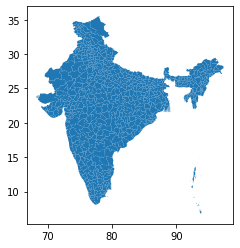

In [56]:
fp = "/home/frank/Documents/env01/crime-analysis-in-India/gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()
merged = map_df.set_index('NAME_2').join(fn.set_index('DISTRICT'))

In [57]:
map_df

,NAME_2,geometry
0,Nicobar Islands,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,North and Middle Andaman,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,South Andaman,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,Anantapur,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,Chittoor,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."
...,...,...
661,Pashchim Medinipur,"POLYGON ((87.22874 21.95608, 87.22562 21.95712..."
662,Purba Medinipur,"MULTIPOLYGON (((87.98972 22.21750, 87.99028 22..."
663,Puruliya,"POLYGON ((85.88916 23.15176, 85.88641 23.15335..."
664,South 24 Parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


In [52]:
merged

,geometry,MURDER
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",101.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",100.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",107.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",113.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",108.0
...,...,...
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",0.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",1.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",4.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",4.0


In [53]:
merged.isna().sum()

geometry      0
MURDER      214
dtype: int64

In [54]:
merged['MURDER'].fillna(merged['MURDER'].mean(), inplace=True)
merged.isna().sum()

geometry    0
MURDER      0
dtype: int64

<AxesSubplot:>

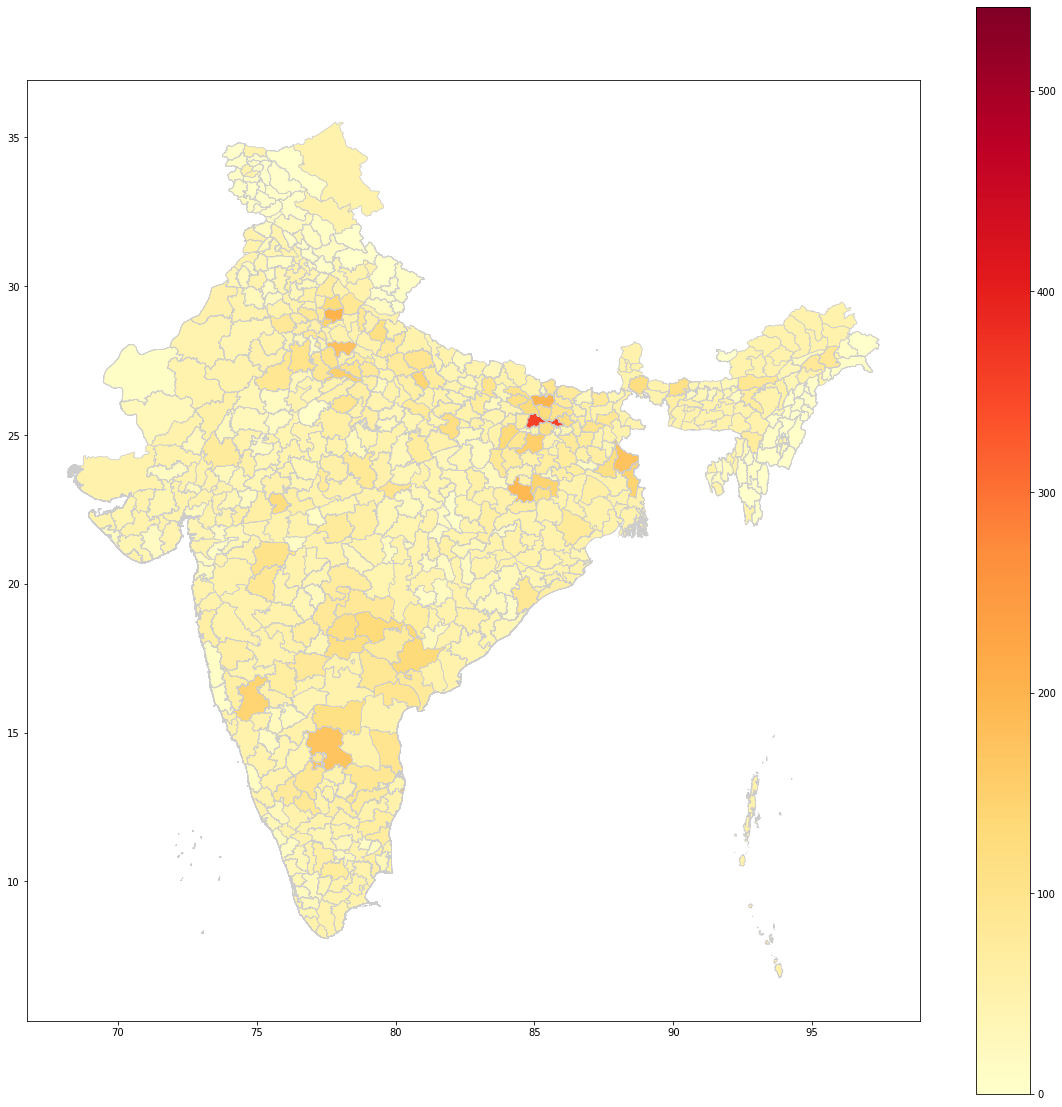

In [55]:
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column='MURDER', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)